# Notebook for feature engineering for NSL-KDD dataset in preparation for modeling and analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid')

from sklearn.model_selection import train_test_split

# load processed data
df = pd.read_csv("../data/processed/KDDTrain+_processed.csv")
df.shape

(125973, 34)

## Check Label Distribution

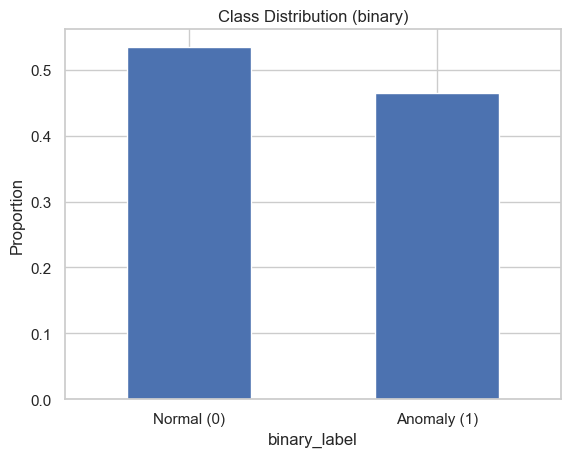

In [2]:
df['binary_label'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Class Distribution (binary)')
plt.ylabel('Proportion')
plt.xticks(ticks = [0, 1], labels = ['Normal (0)', 'Anomaly (1)'], rotation = 0)
plt.show()

## Define Features and Target

In [3]:
# define features and target
X = df.drop(columns = ['binary_label'])
y = df['binary_label']

print(f"X shape: {X.shape}")
print(f"y distribution: {y.value_counts().to_dict()}")

X shape: (125973, 33)
y distribution: {0: 67343, 1: 58630}


## Optional Feature Inspection

In [4]:
# check for any remaining constant or low-variance features
low_var = X.var().sort_values().head(10)
low_var

hot                       1.000008
wrong_fragment            1.000008
duration                  1.000008
land                      1.000008
num_file_creations        1.000008
protocol_type             1.000008
same_srv_rate             1.000008
dst_host_diff_srv_rate    1.000008
dst_host_same_srv_rate    1.000008
dst_host_srv_count        1.000008
dtype: float64

## Train-Test Split (Stratified)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (100778, 33), Test Shape: (25195, 33)


## Save for Modeling

In [6]:
X_train.to_csv("../data/processed/X_train.csv", index = False)
X_test.to_csv("../data/processed/X_test.csv", index = False)
y_train.to_csv("../data/processed/y_train.csv", index = False)
y_test.to_csv("../data/processed/y_test.csv", index = False)

print("Saved train/test splits to /data/processed")

Saved train/test splits to /data/processed
